[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/16gfhvBHw_2bXXVwJGXcZPU2jxShTrZo9?usp=sharing)

## **Homework 4 - Network Models**

### **Hemalata Nayak**
### **Data 641-01, Spring 2024**
### April 8, 2024

#**Q1.**

**Build (draw too) an Erdös-Renyi random network with n = 1000 nodes and p = 0.002. That is, a network with n nodes, where each pair of nodes has probability p of being connected. Plot its degree distribution.**

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


import itertools
import random

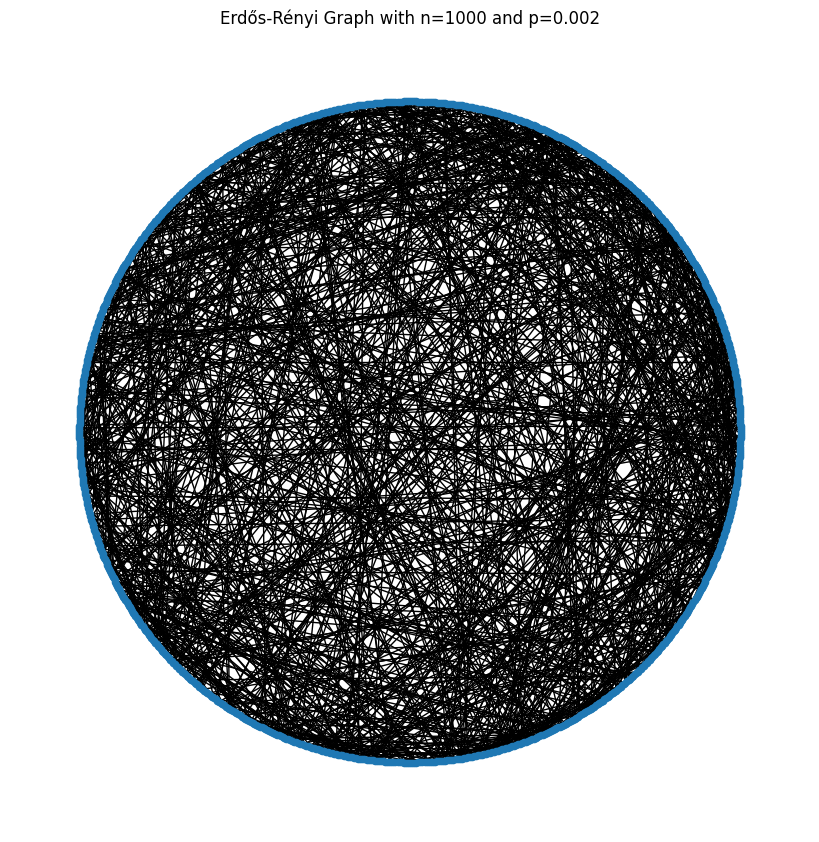

In [2]:
# Step 1: Generate the Erdős-Rényi graph
n = 1000  # Number of nodes
p = 0.002  # Probability of edge creation

# Define the function

def Erdos_renyl_graph(N, P):
    G = nx.Graph()
    G.add_nodes_from(range(N))

    for i,j in itertools.combinations(G.nodes, 2):
      r = random.random()
      if r < P:
        G.add_edge(i,j)

    return G



# Step 2: Draw the graph
G = Erdos_renyl_graph(n, p)
plt.figure(figsize=(8, 8))  # Set the figure size

# Use a simple layout and smaller nodes for clarity
pos = nx.circular_layout(G)
nx.draw(G, pos, node_size=20)
plt.title("Erdős-Rényi Graph with n=1000 and p=0.002")
plt.show()

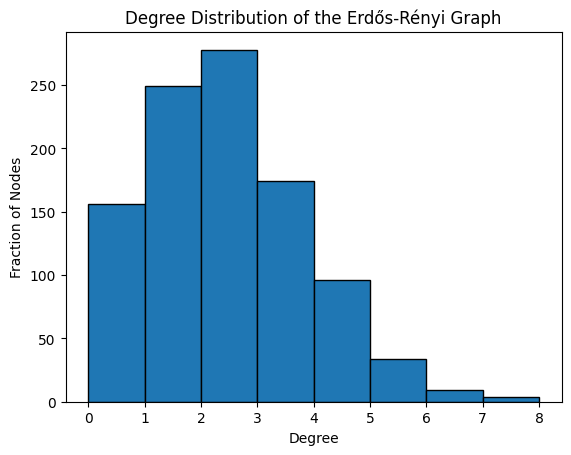

In [3]:
# Step 3: Calculate and plot the degree distribution
degrees = [G.degree(n) for n in G.nodes()]
# Set the figure size for the degree distribution plot
degree_counts, degree_bins, _ = plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1, 1), edgecolor='black')
plt.title("Degree Distribution of the Erdős-Rényi Graph")
plt.xlabel("Degree")
plt.ylabel("Fraction of Nodes")
plt.show()

**b)What is the largest degree of the network? and What is the mode of the distribution (i.e. the most common value of the degree)?**

In [4]:
import statistics
# Find the largest degree
degrees = [G.degree(n) for n in G.nodes()]
largest_degree = max(degrees)
print(f"Largest degree: {largest_degree}")

# Find the mode of the degree distribution
# Degree count and degree_bins has been defined in the above cell.
most_common_degree = degree_bins[np.argmax(degree_counts)]

print(f"The degree value with the highest frequency is: {most_common_degree}")

Largest degree: 8
The degree value with the highest frequency is: 2.0


##Answer:

* The largest degree of the network is 8.
* The mode of the distribution is 2.

**c)Is the network connected? If not, how many nodes are in the giant component?**

In [5]:
if nx.is_connected(G)==True:
  print("The network is fully connected.")
else:
  print("The network is not fully connected")

print(f"The no. of connected components in the network is: {nx.number_connected_components(G)}")
# list(nx.connected_components(G))

components = list(nx.connected_components(G))
nodes = len(max(components, key=len))
print(f"There are {nodes} nodes in the giant component.")

The network is not fully connected
The no. of connected components in the network is: 179
There are 792 nodes in the giant component.


## Answer

The network is not fully connected. There are 792 nodes in the giant component.

**d) What is the average clustering coefficient? Compare it with the link probability p.**

##**Answer:**
Clustering coefficient refers to the ratio of the actual number of links among the nodes to the maximum number of links in the neighborhood of a node.

Local clustering coefficient for node *i* is given by,
$$
C(i)=\frac{2*N(i)}{k_i(k_i-1)}
$$
Where, $N(i)$= no. of links between neighbors of node *i*, and
 $k_i$ = degree of node *i*

**Note**
If degree is less than 2, then clustering coefficient is zero.

Now, the average clustering coefficient is given by,
$$
C = \frac{1}{N} \sum C(i)
$$

Where N = Total no. of nodes

In [6]:
# Calculate the average clustering coefficient
avg_clustering_coefficient = nx.average_clustering(G)

print(f"Average clustering coefficient: {avg_clustering_coefficient}")
print(f"Link probability p: {p}")

# Compare the average clustering coefficient with the link probability p
if avg_clustering_coefficient > p:
    print("The average clustering coefficient is greater than the link probability p.")
elif avg_clustering_coefficient < p:
    print("The average clustering coefficient is less than the link probability p.")
else:
    print("The average clustering coefficient is equal to the link probability p.")

Average clustering coefficient: 0.0007142857142857142
Link probability p: 0.002
The average clustering coefficient is less than the link probability p.


##Discussion

* The average clustering coefficient of the network is 0.0007 which is almost similar to link probability.
*  When the link probability is low, the graph tends to be sparse, with fewer edges. In this case, the Average clustring coefficient is typically small because there are fewer opportunities for nodes to form triangles (clusters).

**e) What is the network diameter?**

##**Answer**
Diameter of a network is the shortest distance between the two most distant nodes in the network.

In this case as the network is not fully connected, the concept of diameter is not well-defined because there may be no path between certain pairs of nodes which will give us infinity in return. So, we will calculate the diameter of the giant connected component.


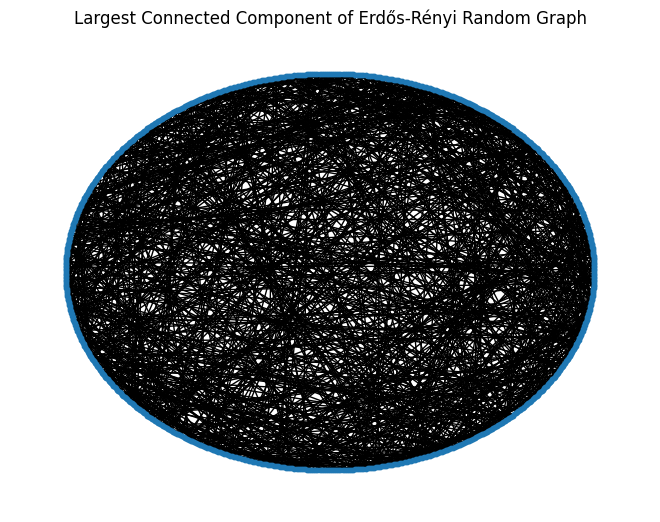

Network Diameter: 24


In [7]:
# Get the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)
pos = nx.circular_layout(subgraph)
nx.draw(subgraph, pos, with_labels=False, node_size=10)
plt.title("Largest Connected Component of Erdős-Rényi Random Graph")
plt.show()
# Calculate the network diameter
diameter = nx.diameter(subgraph)

print(f"Network Diameter: {diameter}")

The diameter of the network (giant connected component) is found to be 24.

##**Extra-credit**

**Build Watts–Strogatz networks with 1000 nodes, k=4, and these values for the rewiring probability: p=0.0001, 0.001, 0.01, 0.1, 1. Compute and compare their degree distributions, by plotting them in the same diagram.**

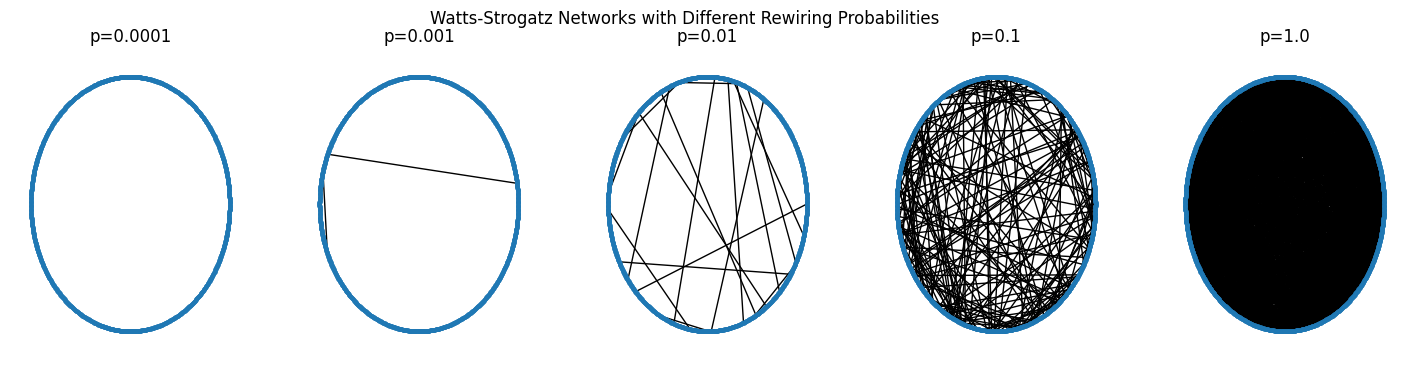

In [8]:
# Parameters
n = 1000  # Number of nodes
k = 4  # Number of nearest neighbors
rewiring_probabilities = [0.0001, 0.001, 0.01, 0.1, 1.0]

# Create a figure with subplots for each rewiring probability
fig, axs = plt.subplots(1, len(rewiring_probabilities), figsize=(18, 4))

def watts_strogatz_graph(N, K, P):
    # 1. Create a ring of N nodes
    G = nx.cycle_graph(N)

    # 2. Connect each node n to k nearest neighbors
    #    [n-(k//2), ... , n-1, n+1, ... , n+(k//2)]
    for n in G.nodes:
        for i in range(1, k // 2 + 1):
            left  = (n-i) % N
            right = (n+i) % N
            G.add_edge(n, left)
            G.add_edge(n, right)

    # 3. Rewire edges with probability p
    for u, v in list(G.edges):
        if random.random() < P:
            not_neighbors = set(G.nodes) - set(G.neighbors(u)) - {u}
            w = random.choice(list(not_neighbors))
            G.remove_edge(u, v)
            G.add_edge(u, w)

    return G

# Generate and plot Watts-Strogatz networks with different rewiring probabilities
networks=[]
for i,p in enumerate(rewiring_probabilities):
    # Generate Watts-Strogatz network
    G = watts_strogatz_graph(n, k, p)

     # Draw the graph
    pos = nx.circular_layout(G)
    nx.draw(G, pos, ax=axs[i], node_size=5)
    axs[i].set_title(f"p={p}")
    networks.append(G)

plt.suptitle("Watts-Strogatz Networks with Different Rewiring Probabilities")
plt.show()



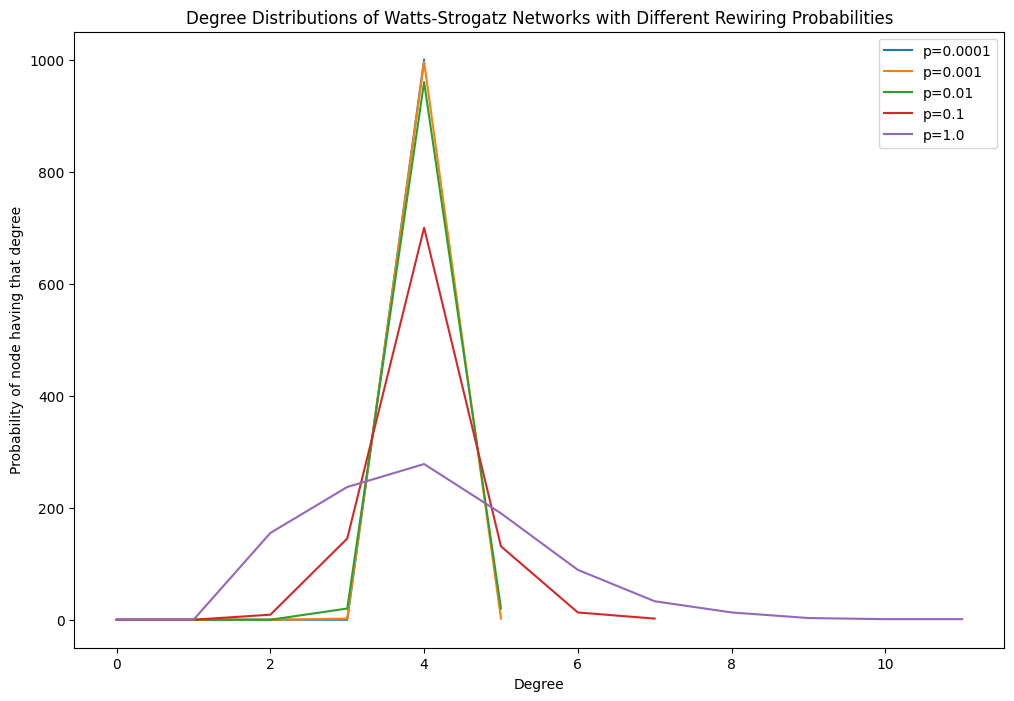

In [9]:
# Calculate degree distributions
degree_distributions = []
for G in networks:
    degrees = [G.degree(n) for n in G.nodes()]
    degree_distribution = np.bincount(degrees)
    # degree_distribution = np.bincount(degrees) / float(sum(np.bincount(degrees)))
    degree_distributions.append(degree_distribution)

# Plot the degree distributions
plt.figure(figsize=(12, 8))
for i, p in enumerate(rewiring_probabilities):
    plt.plot(degree_distributions[i], label=f"p={p}")

plt.title("Degree Distributions of Watts-Strogatz Networks with Different Rewiring Probabilities")
plt.xlabel("Degree")
plt.ylabel("Probability of node having that degree")
plt.legend()
plt.show()

##Discussion

The above graph illustrates the degree distribution of a Watts-Strogatz network across various rewiring probabilities. At the lowest probability (p=0.0001), the degree distribution centers around 4, reflecting the predetermined degree chosen during network construction. The impact on the network is minimal due to the exceedingly low rewiring probability. Conversely, at higher rewiring probabilities (p=1), the degree distribution still peaks around 4, but exhibits a broader distribution.